# Qiskit

Qiskit is an open-source framework designed to facilitate quantum computing using Python. It provides tools for developing quantum algorithms, simulating quantum systems, and executing quantum circuits on quantum hardware and simulators. 

In [34]:
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
from numpy import pi

## Hello Word in Qiskit

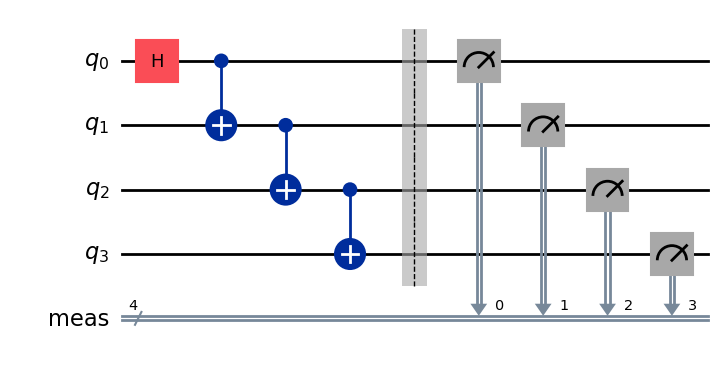

In [41]:
# Create a new circuit with two qubits
qc = QuantumCircuit(4)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)
qc.measure_all()

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")
qc.draw("mpl", style="iqx")

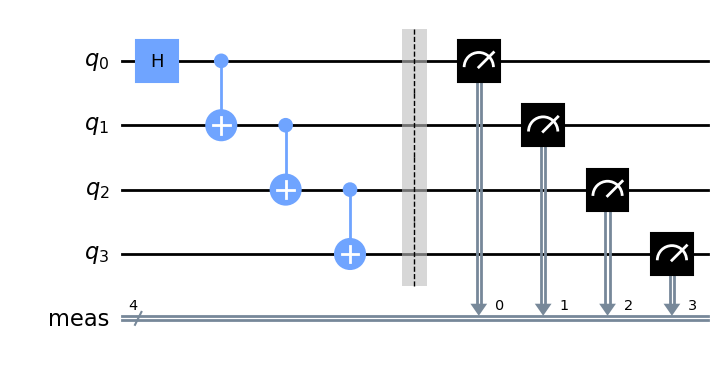

In [40]:
qc.draw("mpl", style='clifford')

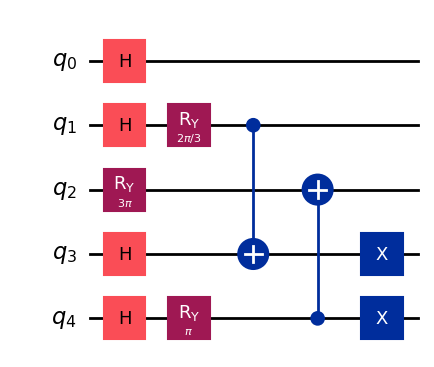

In [36]:
qc = QuantumCircuit(5)
qc.h([0, 1, 3, 4])
qc.ry(2*pi/3, 1)
qc.ry(pi, 4)
qc.ry(3*pi, 2)
qc.cx(1, 3)
qc.cx(4, 2)
qc.x([3, 4])

qc.draw("mpl")


## Simulation

In [44]:
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)
qc.measure_all()

simulator = AerSimulator()
result = simulator.run(qc, shots=10000).result()
counts = result.get_counts()

# Affichage des états les plus fréquents
print("\nDistribution des états les plus fréquents:")
sorted_counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))
for state, count in sorted_counts.items():
    print(f"{state}: {count/10000:.3f}")


Distribution des états les plus fréquents:
0000: 0.510
1111: 0.490


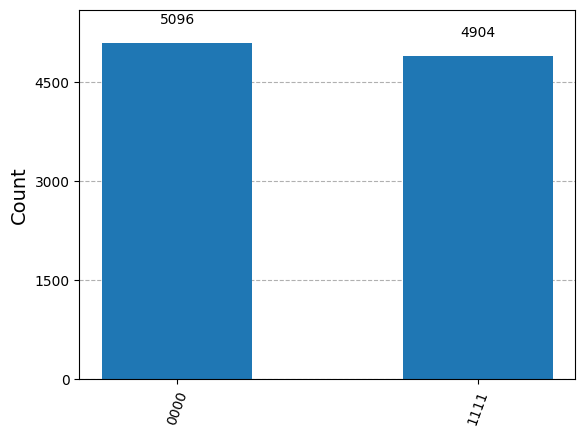

In [46]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

## Graph partitioning problem

This code is essentially trying to find a good way to divide the graph into two parts (partitioning) using quantum computing techniques. The final "average gain" value indicates how successful the partitioning was.

Think of it like trying to divide a group of people (represented by the nodes) into two teams, where some people have relationships with others (represented by the edges), and you're using quantum computing to find a good way to make this division.

In [30]:
!pip install -q qiskit-aer
!pip install -q networkx

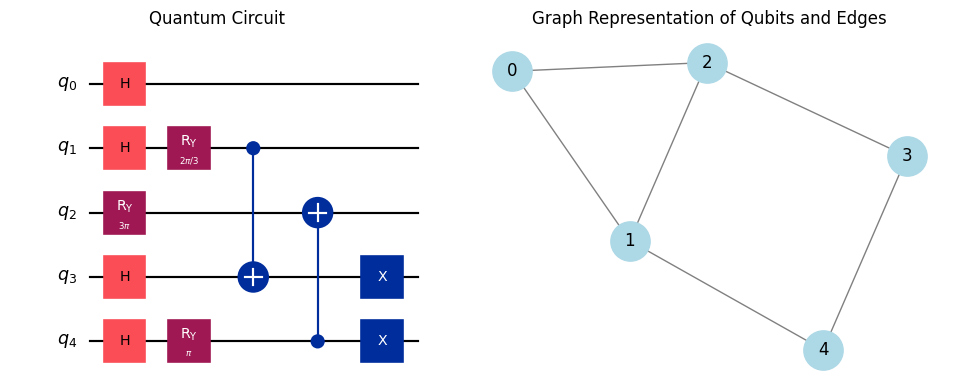

Average gain: 3.0263671875


In [31]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import BackendEstimatorV2 as Estimator
from qiskit_aer import AerSimulator

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 1. Create the quantum circuit
qc = QuantumCircuit(5)
qc.h([0, 1, 3, 4])  # Apply Hadamard gates to qubits 0, 1, 3, and 4
qc.ry(2*np.pi/3, 1)  # Apply a Y rotation to qubit 1
qc.ry(np.pi, 4)      # Apply a Y rotation to qubit 4
qc.ry(3*np.pi, 2)    # Apply a Y rotation to qubit 2
qc.cx(1, 3)          # Apply a CNOT gate with qubit 1 as control and qubit 3 as target
qc.cx(4, 2)          # Apply a CNOT gate with qubit 4 as control and qubit 2 as target
qc.x([3, 4])         # Apply X gates to qubits 3 and 4

# 2. Define the observable and the edges
data = [
    "IIIZZ",  # edge (0,1)
    "IIZIZ",  # edge (0,2)
    "IZIZI",  # edge (1,2)
    "ZIIZI",  # edge (1,4)
    "IIZZI",  # edge (2,3)
    "IZZII",  # edge (3,4)
    "IIIII"   # constant term
]
edges = [
    (0, 1),  # Corresponds to "IIIZZ"
    (0, 2),  # Corresponds to "IIZIZ"
    (1, 2),  # Corresponds to "IZIZI"
    (1, 4),  # Corresponds to "ZIIZI"
    (2, 3),  # Corresponds to "IIZZI"
    (3, 4)   # Corresponds to "IZZII"
]

# 3. Create the graph
graph = nx.Graph()
graph.add_edges_from(edges)

# 4. Display side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Draw the quantum circuit
qc.draw("mpl", ax=axes[0])
axes[0].set_title("Quantum Circuit")

# Draw the graph
nx.draw(
    graph,
    with_labels=True,
    node_color='lightblue',
    node_size=800,
    font_size=12,
    edge_color='gray',
    ax=axes[1]
)
axes[1].set_title("Graph Representation of Qubits and Edges")

plt.tight_layout()
plt.show()

# 5. Define the coefficients and compute the average gain
coeffs = [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, 3.0]  # 3.0 = 6/2 because there are 6 edges
gain_operator = SparsePauliOp(data=data, coeffs=coeffs)

# Compute the average gain
estimator = Estimator(backend=AerSimulator())
job = estimator.run([(qc, gain_operator)])
average_gain = job.result()[0].data.evs

print(f"Average gain: {average_gain}")


In [32]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import BackendEstimatorV2 as Estimator
from qiskit_aer import AerSimulator
import numpy as np

# 1. Circuit de la question 5 - vérifions qu'il est correct
qc = QuantumCircuit(5)
qc.h([0, 1, 3, 4])  # Hadamard sur qubits 0,1,3,4
qc.ry(2*np.pi/3, 1) # Rotation Y de 2π/3 sur qubit 1
qc.ry(np.pi, 4)     # Rotation Y de π sur qubit 4
qc.ry(3*np.pi, 2)   # Rotation Y de 3π sur qubit 2
qc.cx(1, 3)         # CNOT contrôle=1, cible=3
qc.cx(4, 2)         # CNOT contrôle=4, cible=2
qc.x([3, 4])        # Portes X sur qubits 3 et 4

# 2. Observable de gain avec les bonnes correspondances qubits
data = [
    "IIIZZ",  # arête (0,1) : qubits 4,3
    "IIZIZ",  # arête (0,2) : qubits 4,2
    "IZIZI",  # arête (1,2) : qubits 3,2
    "ZIIZI",  # arête (1,4) : qubits 3,0
    "IIZZI",  # arête (2,3) : qubits 2,1
    "IZZII",  # arête (3,4) : qubits 1,0
    "IIIII"   # terme constant
]
coeffs = [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, 3.0]

data = ["ZIZII", "IZZII", "ZIIZI", "IIZZI", "IIIII"]
coeffs = [1.5, 0.5, -0.5, 1, 2]

gain_operator = SparsePauliOp(data=data, coeffs=coeffs)

# 3. Calcul avec plus de shots pour plus de précision
simulator = AerSimulator()
estimator = Estimator(backend=simulator)
job = estimator.run([(qc, gain_operator)])
gain_moyen = job.result()[0].data.evs

print(f"Gain moyen : {gain_moyen}")

# Distribution des états
qc_mesure = qc.copy()
qc_mesure.measure_all()
counts = simulator.run(qc_mesure, shots=10000).result().get_counts()
print("\nDistribution des états les plus fréquents:")
sorted_counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True)[:5])
for state, count in sorted_counts.items():
    print(f"{state}: {count/10000:.3f}")

# Calculons aussi la contribution de chaque terme
print("\nContribution de chaque terme:")
for i, (pauli, coeff) in enumerate(zip(data, coeffs)):
    job_term = estimator.run([(qc, SparsePauliOp([pauli], [coeff]))])
    term_value = job_term.result()[0].data.evs
    print(f"Terme {i} ({pauli}, {coeff:>5.1f}): {term_value.real:.4f}")

Gain moyen : 3.4990234375

Distribution des états les plus fréquents:
01011: 0.122
11111: 0.121
10111: 0.119
01010: 0.116
00010: 0.116

Contribution de chaque terme:
Terme 0 (ZIZII,   1.5): 1.5000
Terme 1 (IZZII,   0.5): 0.0022
Terme 2 (ZIIZI,  -0.5): -0.0100
Terme 3 (IIZZI,   1.0): -0.0151
Terme 4 (IIIII,   2.0): 2.0000


## Diagram

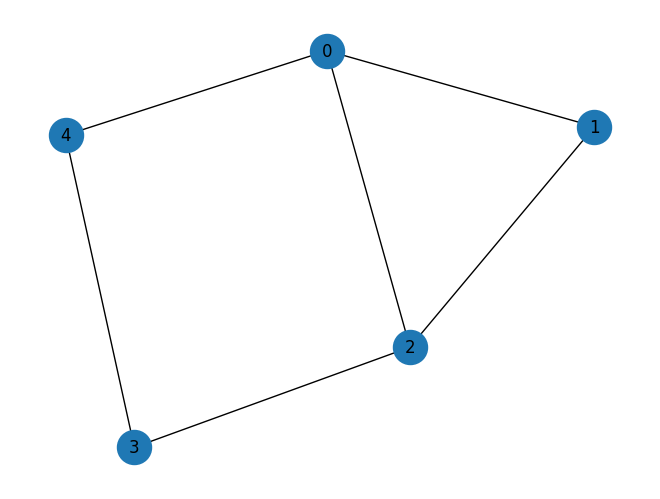

In [33]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np

n = 5

graph = rx.PyGraph()
graph.add_nodes_from(np.arange(0, n, 1))
edge_list = [(0, 1, 1.0), (0, 2, 1.0), (0, 4, 1.0), (1, 2, 1.0), (2, 3, 1.0), (3, 4, 1.0)]
graph.add_edges_from(edge_list)
draw_graph(graph, node_size=600, with_labels=True)

## Simulation

In [48]:
!pip install -q qiskit-ibm-runtime

In [49]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer, plot_histogram
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
import matplotlib.pyplot as plt

# Définition du SEED
SEED = 42

# Création du circuit
circuit = QuantumCircuit(4)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.cx(2, 3)
circuit.measure_all()

# Création d'un modèle de bruit basé sur un vrai ordinateur quantique
device = FakeManilaV2()
noise_model = NoiseModel.from_backend(device)

# Configuration du simulateur avec bruit et SEED
simulator = AerSimulator(noise_model=noise_model, seed_simulator=SEED)

# Simulation avec bruit
result = simulator.run(circuit, shots=1000).result()
noisy_counts = result.get_counts()

# Affichage et sauvegarde du circuit
print("Diagramme du circuit :")
circuit_figure = circuit.draw(output='mpl', style='iqx')
circuit_figure.savefig('circuit_diagram.png', dpi=300, bbox_inches='tight')
plt.close(circuit_figure)

# Affichage des états les plus fréquents avec bruit
print("\nDistribution des états avec bruit:")
sorted_counts = dict(sorted(noisy_counts.items(), key=lambda x: x[1], reverse=True))
for state, count in sorted_counts.items():
    print(f"{state}: {count/1000:.3f}")

# Visualisation et sauvegarde de l'histogramme
print(noisy_counts)
histogram_figure = plot_histogram(noisy_counts, title=f'Distribution avec bruit quantique (SEED={SEED})')
histogram_figure.savefig('histogram.png', dpi=300, bbox_inches='tight')
plt.close(histogram_figure)

Diagramme du circuit :

Distribution des états avec bruit:
0000: 0.425
1111: 0.402
1011: 0.047
0100: 0.044
0001: 0.017
1110: 0.015
0010: 0.015
1101: 0.011
0111: 0.005
1000: 0.005
0011: 0.005
0101: 0.004
1100: 0.002
0110: 0.001
1001: 0.001
1010: 0.001
{'0110': 1, '1001': 1, '0111': 5, '1010': 1, '1111': 402, '1101': 11, '1000': 5, '1110': 15, '0101': 4, '1011': 47, '1100': 2, '0100': 44, '0011': 5, '0001': 17, '0010': 15, '0000': 425}


/Users/alain/Workspace/GitHub/Learning/.venv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /Users/alain/Workspace/GitHub/Learning/.venv/lib/python3.11/site-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


## See also

- https://www.youtube.com/watch?v=xgmGK0_KyKc&t=95s
- https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/fake_provider
- https://www.iqmacademy.com/
- https://quantum.country/